In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from ProjPredictor import ProjPredictor
import os
from skimage import io
from skimage.transform import resize
import napari
%gui qt

In [10]:
with open('dentate_projs', 'rb') as dprojs:
    d = pickle.load(dprojs)
    df = pd.DataFrame(d, index=[0])

In [19]:
df = df.transpose()

In [16]:
pd.DataFrame([1,2,3])

,0
0,1
1,2
2,3


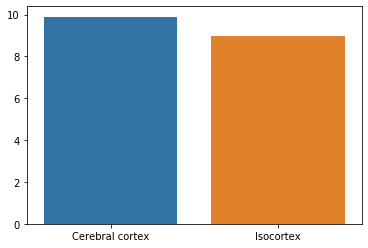

In [34]:
sns.barplot(data=df.transpose())

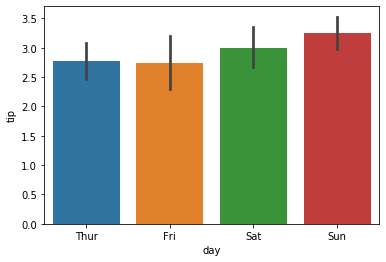

In [33]:
sns.barplot(data=tips, x='day', y='tip')

In [4]:
pp = ProjPredictor(image_file='dentate_signal_aligned_100um_binarized.tif',
                   source_area='Dentate nucleus',
                   verbose=True)
pp.projections = 'dentate_proj_signal_aligned_100um.tif'
areas = ['Somatomotor areas',
         'Somatosensory areas',
         'Gustatory areas',
         'Visceral area',
         'Auditory areas',
         'Visual areas',
         'Anterior cingulate area',
         'Orbital area']
pp.save_proj_by_area(areas, 'dentate_projs')

Loading Voxel Model Cache...
Extracting voxel array, source mask, and target mask...
Loading image "dentate_signal_aligned_100um_binarized.tif"...
Permuting, padding, and reflecting source image...
Saving projections by area to: dentate_projs


In [10]:
pp.projections = 'interposed_proj_signal_aligned_100um.tif'
pp.source_area = 'Interposed nucleus'
pp.save_proj_by_area(areas, 'interposed_projs')

Saving projections by area to: interposed_projs


In [11]:
d_projs = pd.read_pickle('dentate_projs')
i_projs = pd.read_pickle('interposed_projs')

In [12]:
df = pd.concat((d_projs, i_projs))

In [4]:
files = os.listdir('./proj_by_area')
# files = files[list(map(lambda s: s.endswith('proj_by_area'), files))]
projs = [pd.read_pickle('./proj_by_area/' + file) for file in files]
df = pd.concat(projs)

In [5]:
df

,Source area,Target area,Projection strength
0,Dentate nucleus,Somatomotor areas,0.000022
1,Dentate nucleus,Somatosensory areas,0.000037
2,Dentate nucleus,Gustatory areas,0.000005
3,Dentate nucleus,Visceral area,0.000012
4,Dentate nucleus,Auditory areas,0.000073
...,...,...,...
3,Interposed nucleus,Visceral area,0.000013
4,Interposed nucleus,Auditory areas,0.000092
5,Interposed nucleus,Visual areas,0.000668
6,Interposed nucleus,Anterior cingulate area,0.000022


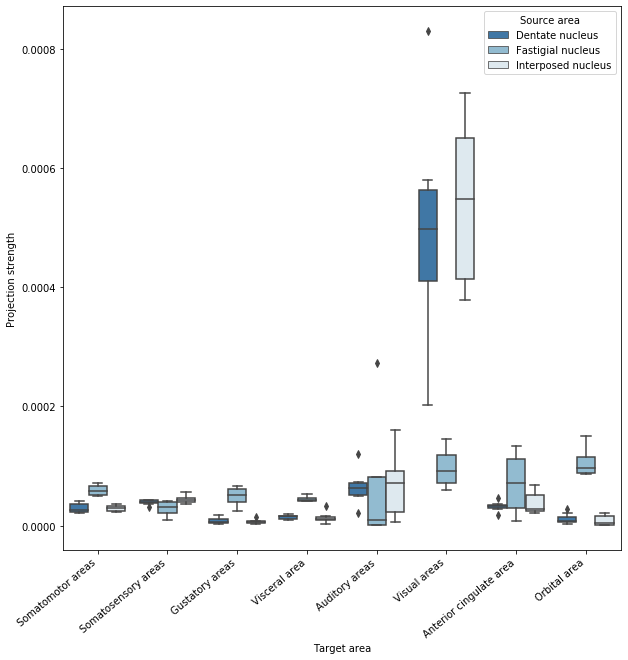

In [14]:
plt.figure(figsize=(10,10))
pal = sns.color_palette("RdBu_r")
ax = sns.boxplot(data=df, x='Target area', y='Projection strength', hue='Source area', palette=pal)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.get_figure().savefig('prelim_plot.pdf')

In [47]:
1 in d.values()

True

In [60]:
pd.DataFrame({'hi': [0,1], 'word': ['b','bye']})

,hi,word
0,0,b
1,1,bye


In [38]:
im = io.imread('datafornomi/DNfornomi/brain175/transformix_output/result_fixed.tif')

In [40]:
imo = io.imread('dentate_signal_aligned_100um_binarized.tif')

In [42]:
v = napari.view_image(np.flipud(resize(im, imo.shape)))
v.add_image(imo)

<Image layer 'Image [1]' at 0x16059ee50>

In [41]:
imo.shape

(65, 88, 88)

In [35]:
im.shape

(260, 354, 354)